### Origin Metadata at Mt. Baker

#### Tasks

1. Load the `data/Events/Mt_Baker_50km_radius_origins.csv` file into a pandas DataFrame

2. Rename columns as necessary to match field names from the CISN/ANSS Parametric Information Schema

3. Convert datetime strings to pandas.Timestamp objects with UTC time-zone, and convert `y`/`n` strings to True / False (bool) objects

4. Create a new dataframe with a multi-index based on `etype` and `origin_datetime`

5. Generates a set of scatter plots comparing of event depths, distances from Mt. Baker’s Summit (mbs), and magnitudes—and their uncertainties—for each event type present in the catalog

6. Examine the low-frequency events in Mt. Baker

#### Setting up a Python virtual environment

1. Create the virtual environment

`python3.10 -m venv mtbaker`

2. Activate the virtual environment

`source mtbaker/bin/activate`

3. Install the necessaery dependencies (consult Mt_Baker_LF_Research/environment.yml)

`pip install <dependency1> <dependency2> ...`

4. Save the installed packages to requirements.txt

`pip freeze > requirements.txt`

5. (optional for Jupyter Notebook users)

- `source mtbaker/bin/activate`
- `pip install ipykernel`
- `python -m ipykernel install --user --name=mtbaker --display-name "Python (mtbaker)"`

6. Use requirements.txt

`pip install -r requirements.txt`

#### Datasets

In [61]:
# import necessary dependencies
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from obspy import read
from obspy.core import UTCDateTime
from obspy.clients.fdsn import Client

In [16]:
# relative Root Directory Path
rrpath = os.path.join('..', '..')
events = os.path.join(rrpath,'data','Events','MtBaker_50km_radius_origins.csv')
phases = os.path.join(rrpath,'data','Events','MtBaker_20km_radius_phases.csv')

# download data 
events_df = pd.read_csv(events)
phases_df = pd.read_csv(phases)

In [17]:
# rename the column
events_df.rename(columns={'to_timestamp': 'origin.datetime'}, inplace=True)
phases_df.rename(columns={'to_timestamp': 'origin.datetime',
                          'to_timestamp.1': 'arrival.datetime'}, inplace=True)

In [4]:
# define function for boolean converter ('y' or 'n')
def bool_converter(x):
    return x == 'y'

In [5]:
for col in ['fdepth', 'fepi', 'ftime']:
    events_df[col] = events_df[col].apply(bool_converter)

In [21]:
# convert datetime to UTC datetime
events_df['origin.datetime (UTC)'] = pd.to_datetime(events_df['origin.datetime'], utc=True, format='mixed')
phases_df['origin.datetime (UTC)'] = pd.to_datetime(phases_df['origin.datetime'], utc=True, format='mixed')
phases_df['arrival.datetime (UTC)'] = pd.to_datetime(phases_df['arrival.datetime'], utc=True, format='mixed')

In [7]:
# create a new dataframe with a multi-index
events_df_multi_index = events_df.set_index(['etype', 'origin.datetime (UTC)'])

In [8]:
event_types = events_df_multi_index.index.get_level_values('etype').unique()
event_types

Index(['uk', 'eq', 'px', 'lf', 'ex', 'su'], dtype='object', name='etype')

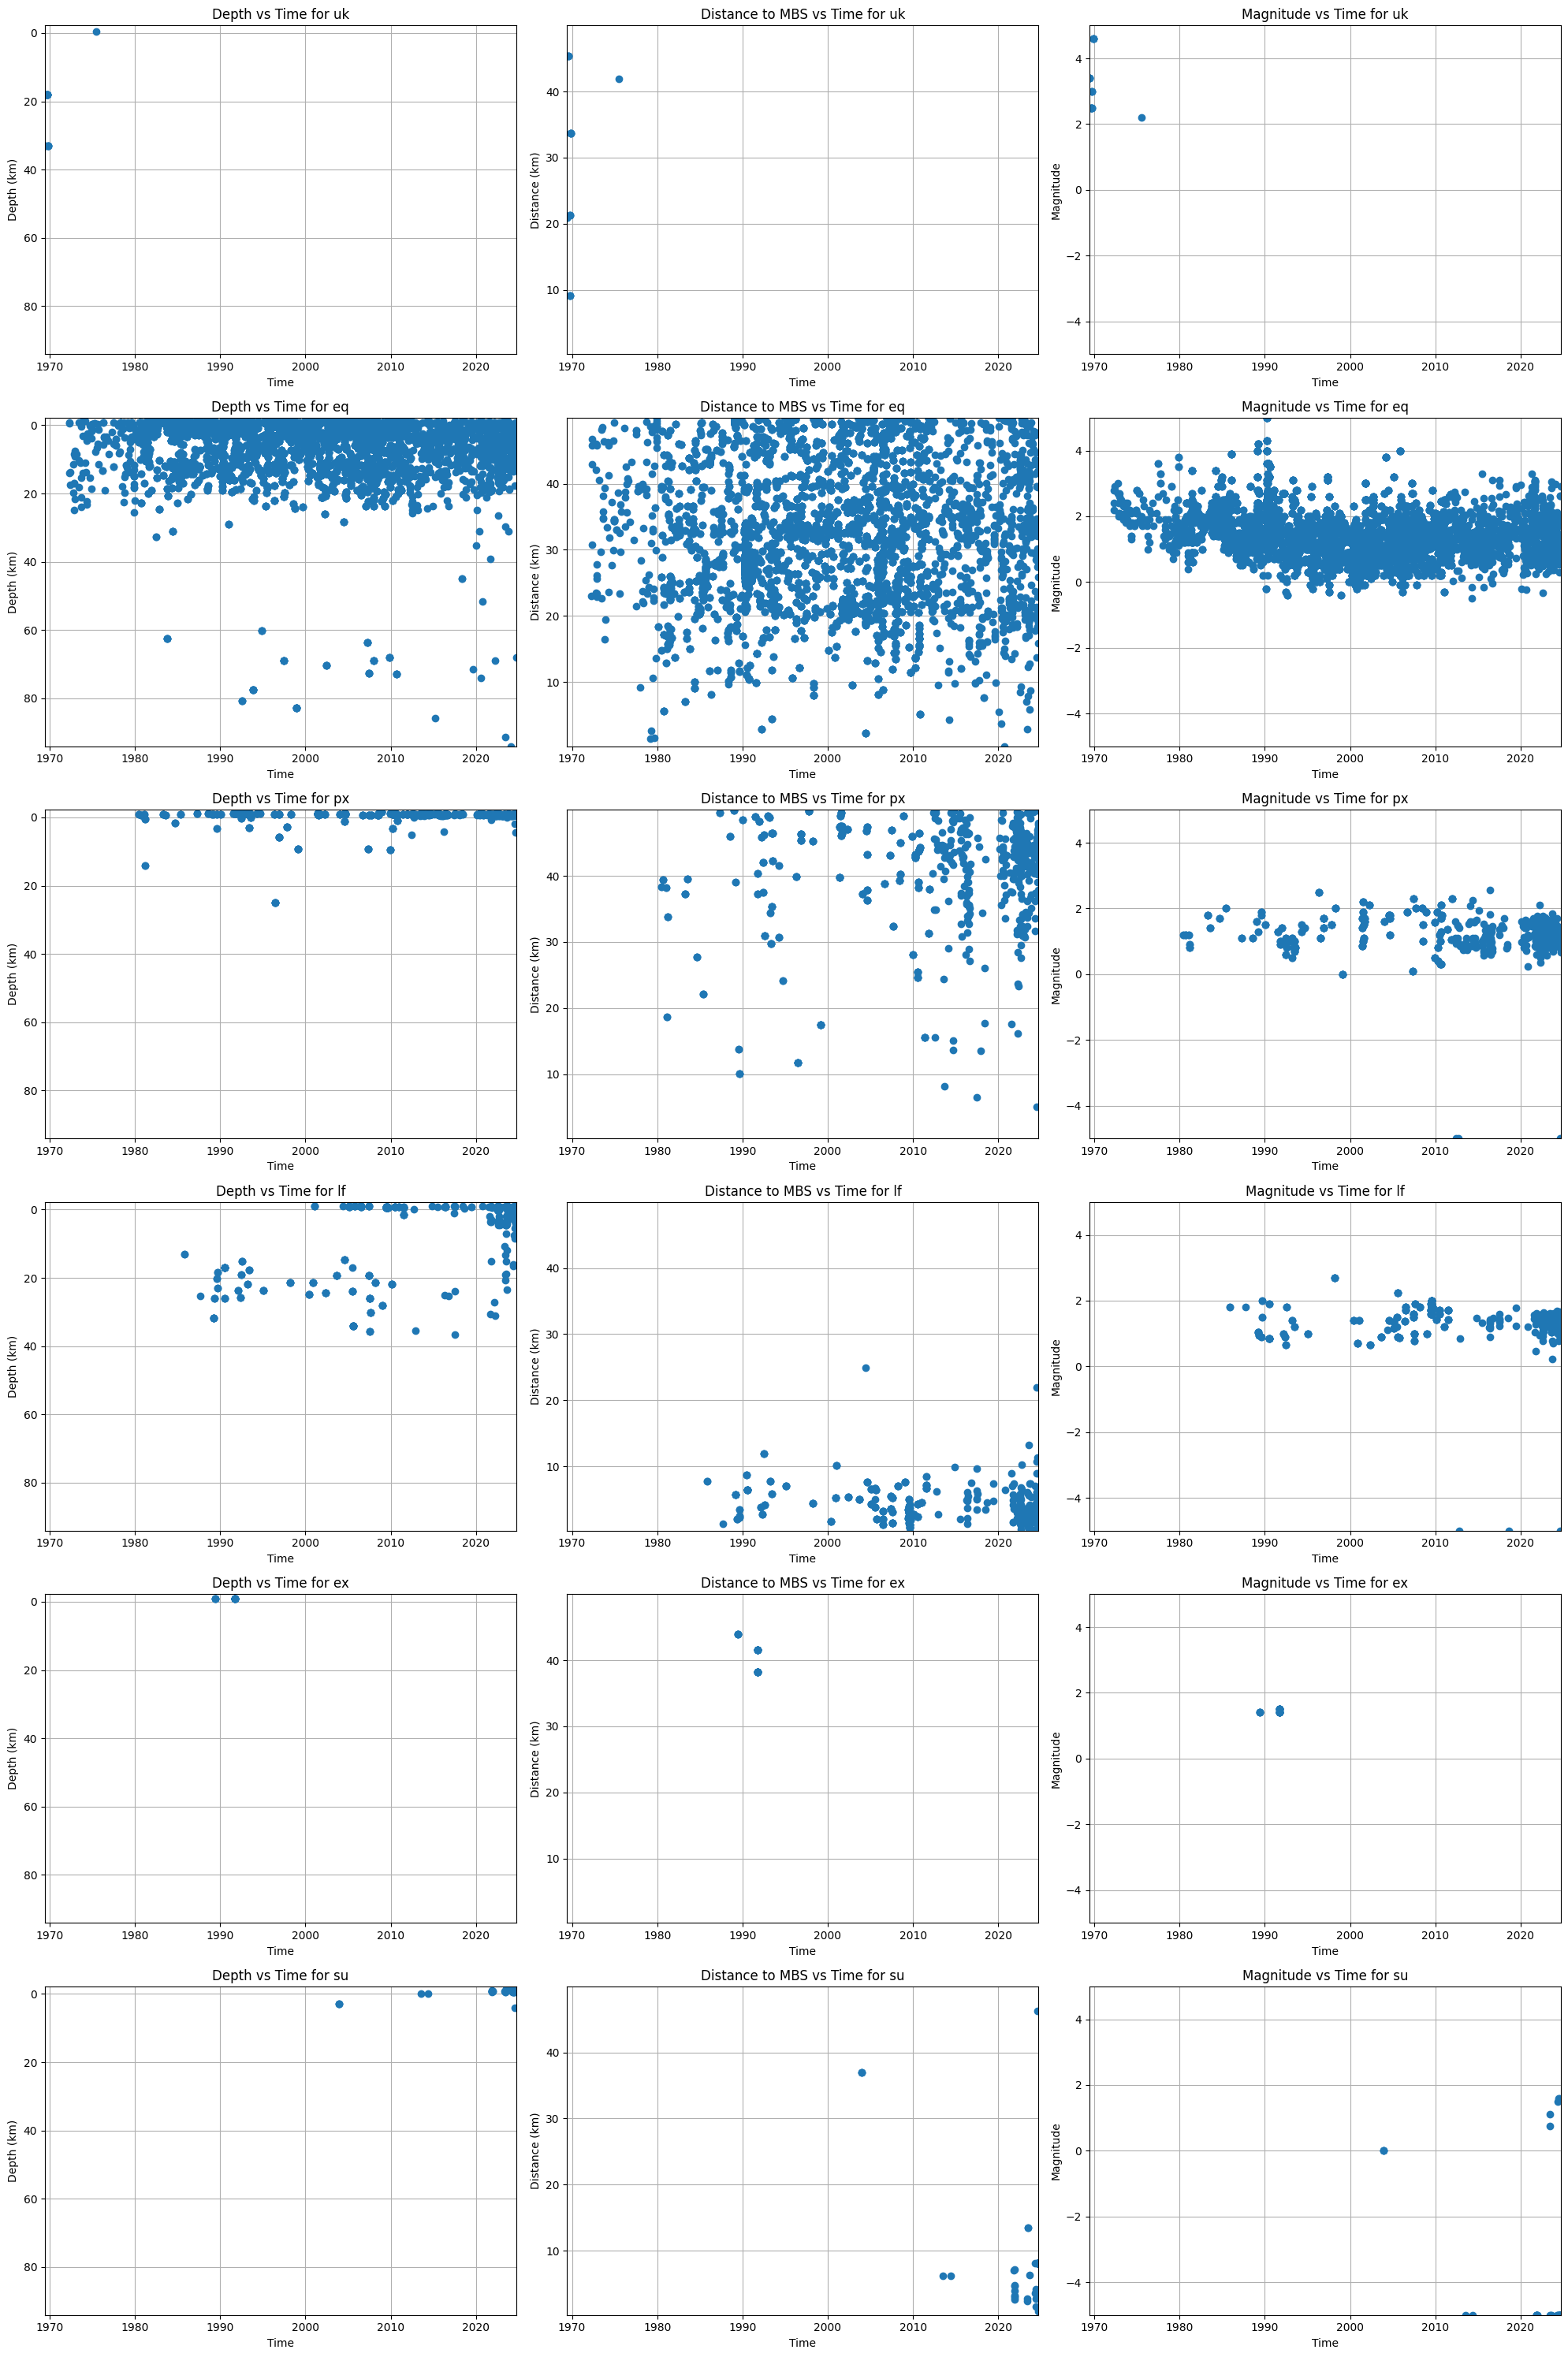

In [10]:
# create subplots
fig, axs = plt.subplots(nrows=len(event_types), ncols=3, figsize=(20, 5 * len(event_types)))

depth_min = events_df_multi_index['depth'].min()
depth_max = events_df_multi_index['depth'].max()

mbs_distance_km_min = events_df_multi_index['mbs_distance_km'].min()
mbs_distance_km_max = events_df_multi_index['mbs_distance_km'].max()

magnitude_min = events_df_multi_index['magnitude'].min()
magnitude_max = events_df_multi_index['magnitude'].max()

time_min = events_df_multi_index.index.get_level_values('origin.datetime (UTC)').min()
time_max = events_df_multi_index.index.get_level_values('origin.datetime (UTC)').max()

for i, etype in enumerate(event_types):
    subset = events_df_multi_index.xs(etype, level='etype') # xs() is cross-section. It is used to retrieve data at a specific level of a MultiIndex.

    # scatter plot for Depth
    axs[i, 0].plot(subset.index, subset['depth'],'o')
    axs[i, 0].set_title(f'Depth vs Time for {etype}')
    axs[i, 0].set_xlabel('Time')
    axs[i, 0].set_ylabel('Depth (km)')
    axs[i, 0].set_ylim(depth_min, depth_max)
    axs[i, 0].set_xlim(time_min, time_max)
    axs[i, 0].invert_yaxis()
    axs[i, 0].grid(True)  

    # scatter plot for Distance to Mt. Baker's Summit
    axs[i, 1].plot(subset.index, subset['mbs_distance_km'], 'o')  
    axs[i, 1].set_title(f'Distance to MBS vs Time for {etype}')
    axs[i, 1].set_xlabel('Time')
    axs[i, 1].set_ylabel('Distance (km)')
    axs[i, 1].set_ylim(mbs_distance_km_min, mbs_distance_km_max)
    axs[i, 1].set_xlim(time_min, time_max)
    axs[i, 1].grid(True)

    # scatter plot for Magnitude
    axs[i, 2].plot(subset.index, subset['magnitude'], 'o') 
    axs[i, 2].set_title(f'Magnitude vs Time for {etype}')
    axs[i, 2].set_xlabel('Time')
    axs[i, 2].set_ylabel('Magnitude')
    axs[i, 2].set_ylim(magnitude_min, magnitude_max)
    axs[i, 2].set_xlim(time_min, time_max)
    axs[i, 2].grid(True)

plt.tight_layout()
plt.show()

#### Mt. Baker LF event examination

In [107]:
# we choose event 60493937
lf_baker = phases_df[phases_df.evid == 60493937]
lf_baker

,evid,etype,orid,origin.datetime,lat,lon,depth,mbs_src_km,arid,arrival.datetime,...,subsource,delta,seaz,ema,timeres,in_wgt,wgt,importance,origin.datetime (UTC),arrival.datetime (UTC)
2923,60493937,lf,2466048,2012-12-06 01:21:57.169998-08,48.7685,-121.853333,35.48,2.730766,11362173.0,2012-12-06 01:22:08.609927-08,...,Jiggle,64.0,184.9,115.0,0.36,1.0,1.57,0.3,2012-12-06 09:21:57.169998+00:00,2012-12-06 09:22:08.609927+00:00
2924,60493937,lf,2466048,2012-12-06 01:21:57.169998-08,48.7685,-121.853333,35.48,2.730766,11362133.0,2012-12-06 01:22:02.371034-08,...,Jiggle,3.9,296.1,173.0,-0.74,1.0,1.10,0.1,2012-12-06 09:21:57.169998+00:00,2012-12-06 09:22:02.371034+00:00
2925,60493937,lf,2466048,2012-12-06 01:21:57.169998-08,48.7685,-121.853333,35.48,2.730766,11362143.0,2012-12-06 01:22:03.10746-08,...,Jiggle,16.0,54.0,154.0,-0.10,1.0,1.10,0.2,2012-12-06 09:21:57.169998+00:00,2012-12-06 09:22:03.107460+00:00
2926,60493937,lf,2466048,2012-12-06 01:21:57.169998-08,48.7685,-121.853333,35.48,2.730766,11362148.0,2012-12-06 01:22:08.706135-08,...,Jiggle,16.0,54.0,154.0,0.79,1.0,1.10,0.4,2012-12-06 09:21:57.169998+00:00,2012-12-06 09:22:08.706135+00:00
2927,60493937,lf,2466048,2012-12-06 01:21:57.169998-08,48.7685,-121.853333,35.48,2.730766,11362153.0,2012-12-06 01:22:04.619532-08,...,Jiggle,30.7,326.5,137.0,-0.13,1.0,1.10,0.2,2012-12-06 09:21:57.169998+00:00,2012-12-06 09:22:04.619532+00:00
2928,60493937,lf,2466048,2012-12-06 01:21:57.169998-08,48.7685,-121.853333,35.48,2.730766,11362158.0,2012-12-06 01:22:10.09502-08,...,Jiggle,30.7,326.5,137.0,-0.56,1.0,1.10,0.3,2012-12-06 09:21:57.169998+00:00,2012-12-06 09:22:10.095020+00:00
2929,60493937,lf,2466048,2012-12-06 01:21:57.169998-08,48.7685,-121.853333,35.48,2.730766,11362163.0,2012-12-06 01:22:05.019201-08,...,Jiggle,34.0,327.6,134.0,0.29,1.0,1.10,0.2,2012-12-06 09:21:57.169998+00:00,2012-12-06 09:22:05.019201+00:00
2930,60493937,lf,2466048,2012-12-06 01:21:57.169998-08,48.7685,-121.853333,35.48,2.730766,11362168.0,2012-12-06 01:22:10.588051-08,...,Jiggle,34.0,327.6,134.0,-0.04,1.0,1.10,0.3,2012-12-06 09:21:57.169998+00:00,2012-12-06 09:22:10.588051+00:00
2931,60493937,lf,2466048,2012-12-06 01:21:57.169998-08,48.7685,-121.853333,35.48,2.730766,11362178.0,2012-12-06 01:22:16.61979-08,...,Jiggle,64.0,184.9,115.0,-0.27,1.0,1.05,0.3,2012-12-06 09:21:57.169998+00:00,2012-12-06 09:22:16.619790+00:00
2932,60493937,lf,2466048,2012-12-06 01:21:57.169998-08,48.7685,-121.853333,35.48,2.730766,11362183.0,2012-12-06 01:22:12.308786-08,...,Jiggle,89.5,143.6,106.0,0.25,1.0,0.57,0.1,2012-12-06 09:21:57.169998+00:00,2012-12-06 09:22:12.308786+00:00


In [108]:
lf_baker['origin.datetime (UTC)'] = lf_baker['origin.datetime (UTC)'].apply(lambda x: UTCDateTime(x))
lf_baker['arrival.datetime (UTC)'] = lf_baker['arrival.datetime (UTC)'].apply(lambda x: UTCDateTime(x))

/var/folders/pf/3_nyp_6j7059y5qxp6tr1_vm0000gn/T/ipykernel_28463/2349316101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lf_baker['origin.datetime (UTC)'] = lf_baker['origin.datetime (UTC)'].apply(lambda x: UTCDateTime(x))
/var/folders/pf/3_nyp_6j7059y5qxp6tr1_vm0000gn/T/ipykernel_28463/2349316101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lf_baker['arrival.datetime (UTC)'] = lf_baker['arrival.datetime (UTC)'].apply(lambda x: UTCDateTime(x))


In [109]:
display(lf_baker.sta.value_counts())
pick = lf_baker[lf_baker.sta == 'MBW'].iloc[0,:]
display(pick)
type(pick['arrival.datetime (UTC)'])

sta
JCW     2
MBW     2
SHUK    2
PASS    2
VDB     2
HTW     2
B011    2
B005    2
MRBL    2
B05D    2
GPW     1
B001    1
B943    1
DOSE    1
Name: count, dtype: int64

evid                                           60493937
etype                                                lf
orid                                            2466048
origin.datetime           2012-12-06 01:21:57.169998-08
lat                                             48.7685
lon                                         -121.853333
depth                                             35.48
mbs_src_km                                     2.730766
arid                                         11362133.0
arrival.datetime          2012-12-06 01:22:02.371034-08
iphase                                                P
quality                                             0.5
fm                                                   ..
net                                                  UW
sta                                                 MBW
location                                               
seedchan                                            EHZ
rflag                                           

obspy.core.utcdatetime.UTCDateTime

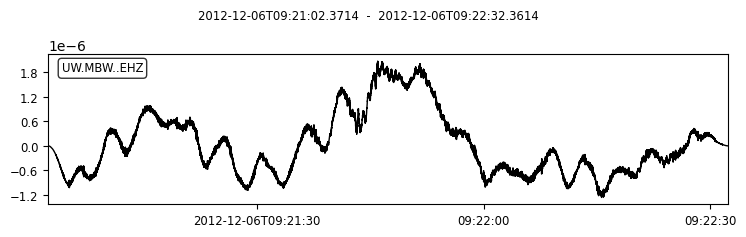

In [110]:
client = Client('IRIS')
time = UTCDateTime('2012-12-06T09:21:57.169998Z')
time = pick['arrival.datetime (UTC)']- 30 # need to fix for leap-second correction

starttime = time - 30
endtime = time + 60
net=pick.net
sta=pick.sta
loc=pick.location
chan=pick.seedchan
Z = client.get_waveforms(net,sta,loc,chan, starttime, endtime, attach_response=True)
Z.remove_response(output='VEL')
Z.merge()
Z.detrend(type='linear')
Z.taper(max_percentage=0.05)
#Z.filter('bandpass',freqmin=0.5, freqmax=25)
Z.plot();

In [117]:
display(Z)

1 Trace(s) in Stream:
UW.MBW..EHZ | 2012-12-06T09:21:02.371400Z - 2012-12-06T09:22:32.361400Z | 100.0 Hz, 9000 samples

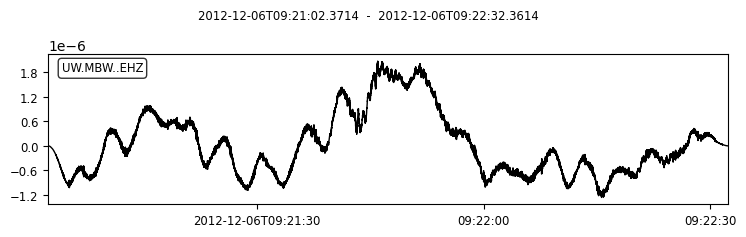

In [111]:
Z.plot();

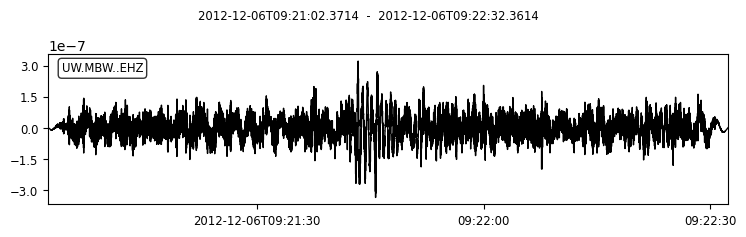

In [112]:
tr = Z.copy()
tr_filt = tr.filter('highpass', freq=.5)
tr_filt.plot();

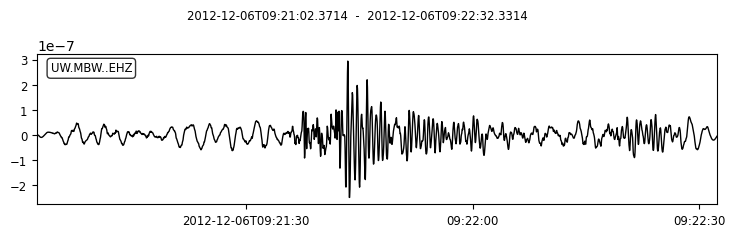

In [113]:
tr_downsampled = tr_filt.copy().decimate(factor=4, strict_length=False)
tr_downsampled.plot();

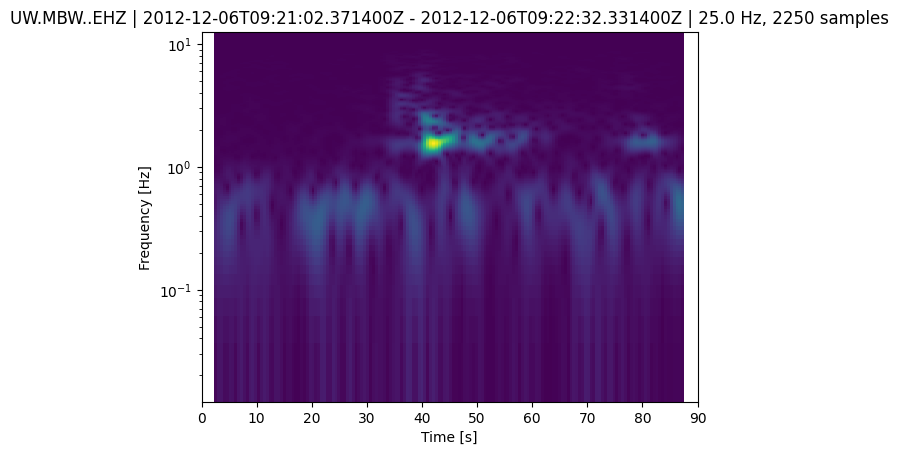

[None]

In [114]:
tr_downsampled.spectrogram(log=True)

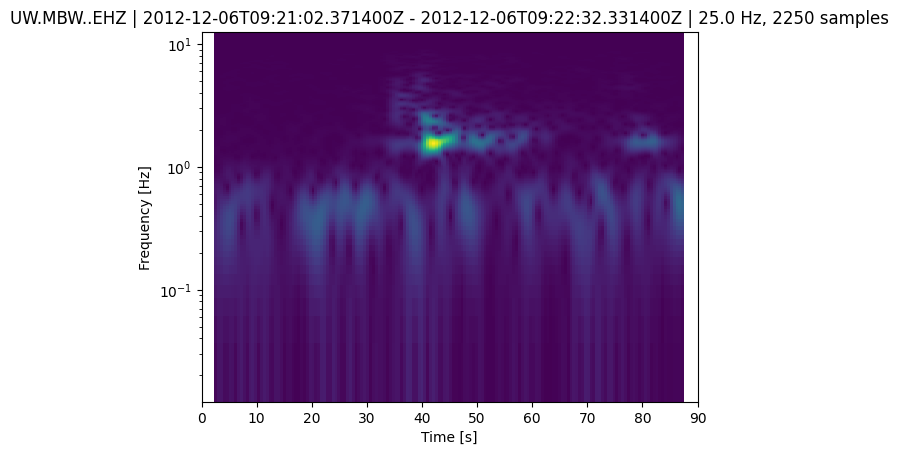

[None]

In [115]:
tr_downsampled.spectrogram(log=True)

In [122]:
filename = '%s.%s.%s.%s.mseed'%([Z[0].stats[_k] for _k in ['network', 'station', 'location', 'channel']])
filename

TypeError: not enough arguments for format string

In [ ]:
f'{Z[0].stats.network}.{Z[0].stats.station}.{Z[0].stats.location}.{Z[0].stats.channel}'

In [124]:
filename = f'{Z[0].id}.mseed'

In [125]:
filename

'UW.MBW..EHZ.mseed'

In [127]:
Z.write(filename, format=None)

/Users/suphakornpoobua/Documents/GitHub/Mt_Baker_LF_Research/mtbaker/lib/python3.10/site-packages/obspy/io/mseed/core.py:773: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


1 Trace(s) in Stream:
UW.MBW..EHZ | 2012-12-06T09:21:02.371400Z - 2012-12-06T09:22:32.361400Z | 100.0 Hz, 9000 samples


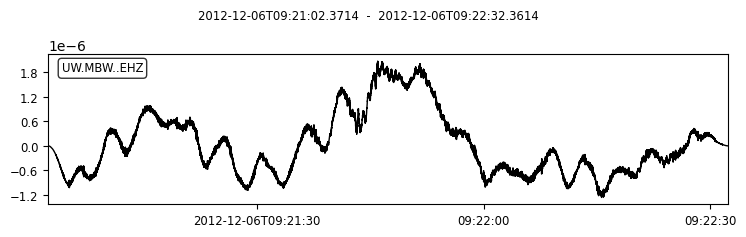

In [128]:
st = read('UW.MBW..EHZ.mseed')
print(st)
st.plot();

#### Acronym from CISN/ANSS Schema

Add a little more information on the Markdown box with the plain-language descriptions of data frame fields

- CISN/ANSS Schema: https://ncedc.org/db/Documents/NewSchemas/PI/v1.6.4/PI.1.6.4/index.htm
- Dataset: https://github.com/Benz-Poobua/Mt_Baker_LF_Research/tree/87829aeb0d14647d2e9a8b986108c42003784ed0/data
- SQL query: https://github.com/Benz-Poobua/Mt_Baker_LF_Research/tree/main/src/PostgreSQL

##### Event identifier and source

`evid`: event identifier; it is possible for several records in the Origin relation to have the same evid. 

`etype`: the type of seismic event 

1. `EQ`: earthquakes

2. `PX`: probable blast

3. `SU`: surface events

4. `UK`: unknown events

5. `LF`: low-frequency seismic events

`commid`: comment identification used to point to free-form comments entered in the Remark relation.

`magtype`: 	magnitude type used to specify the type of the magnitude measure 

`uncertainty`: magnitude uncertainty

`nsta`: the number of stations with non-zero input weights used to compute the magnitude 

`nobs`: the number of observations with non-zero input weights used to compute the magnitude 

`orid`: origin identification used to identify one of the many hypotheses of the actual location of the event 

`auth`: the source of the information (i.e., a network identifier)

##### Origin

`to_timestamp`: datetime associated with information in the record, in true epoch format 

`lat`: the geographic latitude

`lon`: the geographic longitude

`depth`: distance in KM of the earthquake source below the geoid

`mbs_distance_km`: distances from Mt. Baker’s Summit (MBS)

`quality`: the quality of an origin, an arrival, or a mechanism (1.0 = good, 0.0 = bad)

`wrms`: the weighted RMS 

`erhor`: horizontal error; the location uncertainty that accompanies the location

`sdep`: depth error (the standard deviation)

`erlat`: latitude error (the standard deviation)

`erlon`: longitude error (the standard deviation)

##### Inversion

`fdepth`: this attribute indicates if the depth was fixed or not to compute the solution 
 
`fepi`: this attribute indicates if the epicenter was fixed or not to compute the solution 

`ftime`: this attribute indicates if the origin time was fixed or not to compute the solution 

##### Origin error

Elements of the covariance matrix for the location defined by orid. The covariance matrix is symmetric (and positive definite) so that sxy = syx, etc., (x, y, z, t) refer to latitude, longitude, depth and origin time, respectively. They are used to construct the K-dimensional confidence ellipse or ellipsoids at any confidence limit desired. (`sxx`,  `syy`, `szz`, `stt`, `sxy`, `sxz`, `syz`, `stx`, `sty`, `stz`)

`maglarge`: magnitude of largest principal error 

`azilarge`: azimuth of largest principal error 

`diplarge`: dip of largest principal error 

`maginter`: magnitude of intermediate principal error 

`aziinter`: azimuth of intermediate principal error 

`dipinter`: dip of intermediate principal error 

`magsmall`: magnitude of smallest principal error 

`azismall`: azimuth of smallest principal error 

`dipsmall`: dip of smallest principal error 




Change the file name to reflect we're looking at origin metadata.



For requirements.txt please provide some context on how this was generated, and if it was automatically generated by the conda create ... command, add it to the .gitignore file.

